In [1]:
import subprocess
import shlex
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
jar_path = '../SentiStrength.jar'
senti_data_path = '../SentStrength_Data/'

In [3]:
df = pd.read_csv('../../dados/comentarios1.csv')

In [4]:
def RateSentiment(comments):
    p = subprocess.Popen(shlex.split("java -jar '" + jar_path + "' stdin sentidata '" + senti_data_path + "' trinary"),
                        stdin=subprocess.PIPE,
                        stdout=subprocess.PIPE,
                        stderr=subprocess.PIPE)
    
    #Troca todos os espaços, \n, \r, etc, por '+'
    comments = ['+'.join(c) for c in comments.str.split()]
    conc_comments = '\n'.join(comments)
    
    #codifica para mandar
    b = bytes(conc_comments, 'utf-8')
    stdout_byte, stderr_text = p.communicate(b)
    
    #decodifica
    stdout_text = stdout_byte.decode("utf-8")
    
    #troca tab por espaço entre as scores e remove outros espaços
    stdout_text = stdout_text.rstrip().replace("\t"," ").replace("\r","")
    
    return stdout_text.split('\n')

In [5]:
sents_str = RateSentiment(df['text'])

In [6]:
sents_list = [sent.split() for sent in sents_str]
sents_list = [s for s in zip(*sents_list)]

df['sent_pos'] = sents_list[0]
df['sent_neu'] = sents_list[2]
df['sent_neg'] = sents_list[1]

df = df.astype({'sent_pos': int, 'sent_neu': int, 'sent_neg': int})

In [8]:
df.head()

,cid,text,time,author,channel,votes,video_id,parent_id,replies,uploader,uploader_id,video_title,sent_pos,sent_neu,sent_neg
0,UgzBlGJQXIilmNNrc1R4AaABAg,Estou com covid-19 tive sintomas mais no meu p...,2 meses atrás,🔞Canal Marllon YT ⤵️,UCvNuAuBTMykr1V0AvTrjdEg,0,orJy9GCxVHs,NaN,NaN,Dr. Lair Ribeiro Oficial,academialairribeiro,LIVE COVID-19 - PARTE 2,3,-1,-3
1,UgzSflRq03y3bqnVzwJ4AaABAg,"Boa noite Dr. Lair, tudo bem?\nO Senhor aceita...",2 meses atrás,Gladston Cardoso,UCZQ4ckev7OiqZk3FQiWx9iQ,0,orJy9GCxVHs,NaN,NaN,Dr. Lair Ribeiro Oficial,academialairribeiro,LIVE COVID-19 - PARTE 2,2,1,-1
2,UgwNgkRaRBPjOBGsuQh4AaABAg,"Dr Lair sou seu fã, quando puder fale se o aça...",3 meses atrás,Adriano Leal,UCE3KIo9DBVZjnJWL0ie5piw,0,orJy9GCxVHs,NaN,NaN,Dr. Lair Ribeiro Oficial,academialairribeiro,LIVE COVID-19 - PARTE 2,3,-1,-3
3,UgzIrWJMxCaUCHHF4Ed4AaABAg,dr lair eu faco uso do cloreto de magnesio 1 c...,3 meses atrás,anna parreira,UCRevD9obfOXoY5raZQfcycA,0,orJy9GCxVHs,NaN,NaN,Dr. Lair Ribeiro Oficial,academialairribeiro,LIVE COVID-19 - PARTE 2,2,1,-1
4,UgzgLE1od7COmXQxZGN4AaABAg,Oi Dr lair parabéns pelo canal excelente quali...,3 meses atrás,Romero Trindade,UC-h2WEoZnOPFSrHkrg7Ncvg,0,orJy9GCxVHs,NaN,NaN,Dr. Lair Ribeiro Oficial,academialairribeiro,LIVE COVID-19 - PARTE 2,2,-1,-2


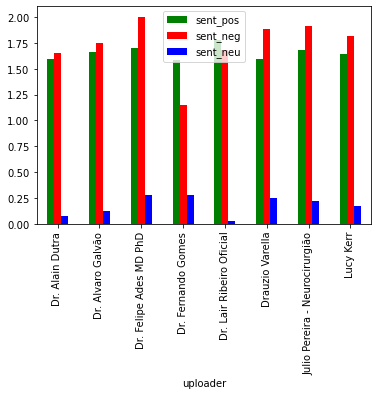

In [40]:
medias = df.groupby('uploader').mean().abs()[['sent_pos','sent_neg','sent_neu']]
medias.plot(kind = 'bar',rot = 90, color=['g','r','b'])
plt.legend()
plt.show()